From [Colormap reference](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)

In [4]:
import sys
sys.path.append('../input-archives/TensorFlow/models/research')
sys.path.append('../src')

In [5]:
import os
import pathlib

In [6]:

import numpy as np
from numpy.ma import masked_array
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [7]:
xx = np.arange(20).reshape((4,5))
rows = np.arange(4)

In [8]:
b=np.array([True, True, False, False])

In [9]:
rows*np.logical_not(b)

array([0, 0, 2, 3])

In [10]:
from vipir.vipir import vipir as vp

../src/vipir/vipir.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from mpl_toolkits.axes_grid1.colorbar import colorbar


In [11]:
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]

In [12]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

In [13]:
gradient.shape

(2, 256)

In [14]:
def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axes = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-.01, .5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

<Figure size 2592x864 with 0 Axes>

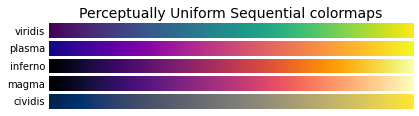

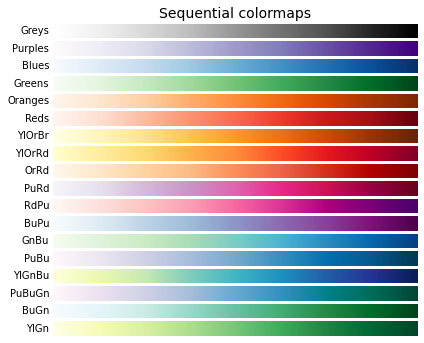

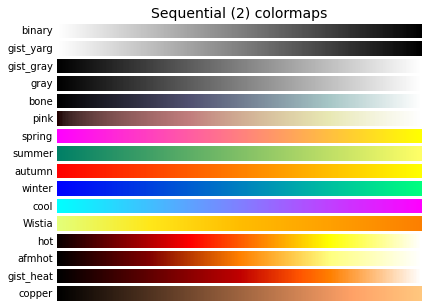

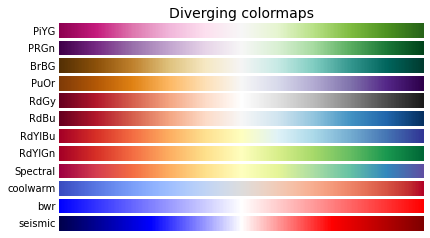

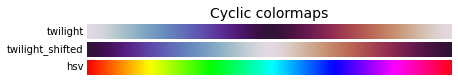

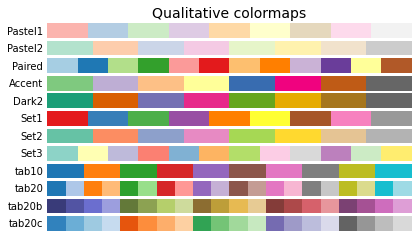

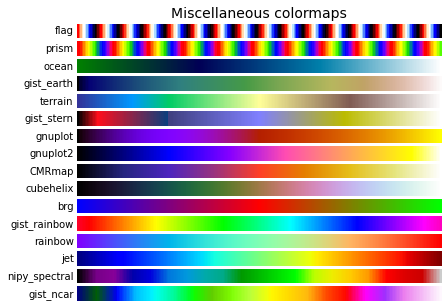

In [15]:
fig = plt.figure(figsize=(36,12))
for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

In [16]:
def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, len(cms), figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

In [17]:
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)

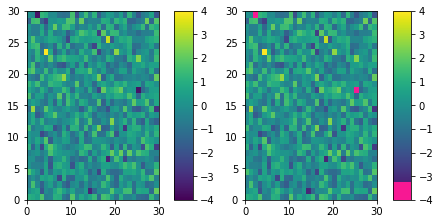

In [18]:
plot_examples([viridis, newcmp])

In [19]:
red = np.array([255,4,9,1])
green = np.array([44,255,9,1])

In [20]:
N=256
red_scale = np.ones((N,4))
red_scale[:,0]=np.linspace(0,red[0]/256,N)
red_scale[:,1]=np.linspace(0,red[1]/256,N)
red_scale[:,2]=np.linspace(0,red[2]/256,N)
red_cmap=ListedColormap(red_scale)

In [21]:
green_scale = np.ones((N,4))
green_scale[:,0]=np.linspace(0,green[0]/256,N)
green_scale[:,1]=np.linspace(0,green[1]/256,N)
green_scale[:,2]=np.linspace(0,green[2]/256,N)
green_cmap=ListedColormap(green_scale)

In [22]:
red_scale[0:5]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.90625000e-03, 6.12745098e-05, 1.37867647e-04, 1.00000000e+00],
       [7.81250000e-03, 1.22549020e-04, 2.75735294e-04, 1.00000000e+00],
       [1.17187500e-02, 1.83823529e-04, 4.13602941e-04, 1.00000000e+00],
       [1.56250000e-02, 2.45098039e-04, 5.51470588e-04, 1.00000000e+00]])

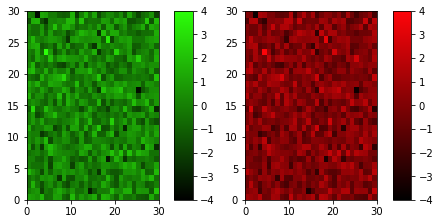

In [23]:
plot_examples([ green_cmap, red_cmap])

In [5]:
from vipir.vipir import get_cdf, get_flist

In [6]:
flist = get_flist('WI937','2020-07-31 18:00:00', '2020-07-31 18:30:00')

In [7]:
flist

[('2020-07-31 18:10:03',
  '/ionosonde/data/WI937/individual/2020/213/ionogram/WI937_2020213181003.NGI'),
 ('2020-07-31 18:20:03',
  '/ionosonde/data/WI937/individual/2020/213/ionogram/WI937_2020213182003.NGI')]

In [8]:
vip = get_cdf(path=flist[1][1])

Rootgroup successfully closed


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\kevin\\AppData\\Local\\Temp\\tmpozwgt9ad'

In [ ]:
thresh=3
o_pwr = vip.snr('O_mode_power')
x_pwr = vip.snr('X_mode_power')

In [ ]:
x_pwr_m = masked_array(x_pwr, x_pwr <=  o_pwr+thresh)
o_pwr_m = masked_array(o_pwr, x_pwr >   o_pwr+thresh)

In [1]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as colors

In [ ]:
gamma=0.5

fig,ax = plt.subplots(figsize=(16,12))

axins1 = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="75%",  # height : 50%
                   loc='center left',
                   bbox_to_anchor=(1.10, 0., 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )

axins2 = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="75%",  # height : 50%
                   loc='center left',
                   bbox_to_anchor=(1.40, 0., 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )

px = ax.imshow(x_pwr_m.T,cmap=green_cmap,
               norm=colors.PowerNorm(gamma=gamma),
              vmin=0, vmax=50) #interpolation='nearest',
cba = fig.colorbar(px, cax=axins1, shrink=0.25) #shrink=0.25, 

po = ax.imshow(o_pwr_m.T,cmap=red_cmap,
               norm=colors.PowerNorm(gamma=gamma),
              vmin=0, vmax=50) # interpolation='nearest',
cbb = fig.colorbar(po, cax=axins2,shrink=0.25) #

ax.set_xlabel('Frequency')
ax.set_ylabel('Range')
ax.invert_yaxis()
ax.set_aspect('auto')
cba.ax.set_title('X Power')
cbb.ax.set_title('O Power')

## HSV Color Mapping

Equations: (https://www.rapidtables.com/convert/color/hsv-to-rgb.html)

Good Article: (http://colorizer.org/)

In [24]:
def hsv_to_rgb(h,s,v):
    c = v*s
    x = c*(1-np.abs(((h/60.0) % 2)-1))
    m = v-c
    
    rgb_tbl = np.array([[c,x,0],
                      [x,c,0],
                      [0,c,x],
                      [0,x,c],
                      [x,0,c],
                      [c,0,x]])
    
    rgb_prime =  rgb_tbl[int(h//60.0)]
    
    rgb = (rgb_prime+m)  #*255
    
    rgba = np.array([*rgb,1])
    
    return rgba

In [25]:
hsv_to_rgb(90.0, 1.0, 1.0)

array([0.5, 1. , 0. , 1. ])

In [26]:
sv = np.linspace(0.0, 1.0, N)
red_hsv = np.array([hsv_to_rgb(0.0, 1.0,v)for v in sv])
green_hsv = np.array([hsv_to_rgb(90.0, 1.0,v)for v in sv])
red_hsv_cmap=ListedColormap(red_hsv)
green_hsv_cmap=ListedColormap(green_hsv)

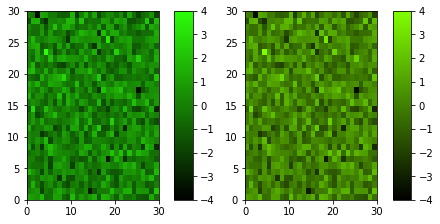

In [27]:
plot_examples([ green_cmap, green_hsv_cmap])

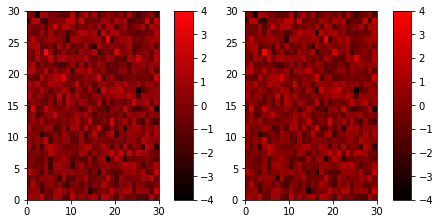

In [28]:
plot_examples([ red_cmap, red_hsv_cmap])

In [ ]:
plot_examples([ green_hsv_cmap, red_hsv_cmap])

In [ ]:
fig,ax = plt.subplots(figsize=(16,12))

axins1 = inset_axes(ax,
                   width="2.5%",  # width = 5% of parent_bbox width
                   height="75%",  # height : 50%
                   loc='center left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )

axins2 = inset_axes(ax,
                   width="2.5%",  # width = 5% of parent_bbox width
                   height="75%",  # height : 50%
                   loc='center left',
                   bbox_to_anchor=(1.15, 0., 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )

px = ax.imshow(x_pwr_m.T,cmap=green_hsv_cmap,
              # norm=colors.PowerNorm(gamma=gamma),
              vmin=0, vmax=50) #interpolation='nearest',
cba = fig.colorbar(px, cax=axins2, shrink=0.25) #shrink=0.25, 

po = ax.imshow(o_pwr_m.T,cmap=red_hsv_cmap,
              # norm=colors.PowerNorm(gamma=gamma),
              vmin=0, vmax=50) # interpolation='nearest',
cbb = fig.colorbar(po, cax=axins1,shrink=0.25) #

ax.set_xlabel('Frequency')
ax.set_ylabel('Range')
ax.invert_yaxis()
ax.set_aspect('auto')
cba.ax.set_title('X Power')
cbb.ax.set_title('O Power')

![image](../data/ionosonde/WI937/individual/2020/131/image/WI937_2020131000403_OX.PNG)

In [ ]:
def plot_color_gradients2(cmap_category, cmap_dict):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_dict)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axes = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_dict):
        ax.imshow(gradient, aspect='auto', cmap=cmap_dict[name])
        ax.text(-.01, .5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

In [ ]:
gradient = np.vstack((gradient, gradient))

In [ ]:
plot_color_gradients2('HSV',{'Green':green_hsv_cmap, 'Red':red_hsv_cmap})